In [1]:
from pyfirmata import Arduino,util
import pandas as pd
import time

In [2]:
port = '/dev/cu.usbmodem14701'  # ou a porta correta do seu Arduino (no Windows 'COM1', por exemplo)

placa = Arduino(port) #assim "placa" representa o Arduino

In [3]:
# Ative a iteração da placa , isto evita o transbordamento da porta serial (de 64 bytes)
it = util.Iterator(placa)
it.start()

In [4]:

# Configura os pinos dos LDRs e do botão
ldr1 = 1
ldr2 = 2
ldr3 = 3  # Pinos analógicos onde os LDRs estão conectados

placa.analog[ldr1].enable_reporting()  # Habilita leitura do pino analógico
placa.analog[ldr2].enable_reporting()  # Habilita leitura do pino analógico
placa.analog[ldr3].enable_reporting()  # Habilita leitura do pino analógico

# Configure o pino digital 2 como entrada digital
botao = placa.get_pin('d:2:i')
botao.enable_reporting()

# Variável para rastrear o estado atual do botão (ligado/desligado)
estado_botao = True
estado_anterior = False

try:
    data_matrix = []  # Matriz para armazenar os dados
    max_lines = 150  # Número máximo de linhas a serem lidas

    while len(data_matrix) < max_lines:
        time.sleep(.1)
       
        # Lê os valores dos LDRs
        ldr1_valor = placa.analog[ldr1].read()
        ldr2_valor = placa.analog[ldr2].read()
        ldr3_valor = placa.analog[ldr3].read()
        
        # Verifica se o botão foi pressionado
        estado_atual = botao.read()
        if estado_atual and not estado_anterior:
            # Alterna o estado do botão
            estado_botao = not estado_botao
            # Adiciona um pequeno atraso para permitir que dê tempo de tirar o dedo do botao
            #time.sleep(0.1)
            
        estado_anterior = estado_atual

        # Adiciona os dados à matriz
        data_matrix.append([ldr1_valor, ldr2_valor, ldr3_valor, 'dia' if estado_botao else 'noite'])

        # Imprime os valores lidos
        print('Valores dos LDRs e estado do botão:', data_matrix[-1])

        time.sleep(1)

except KeyboardInterrupt:
    board.exit()  # Encerra a comunicação com o Arduino ao sair do programa

finally:
    # Salva a matriz de dados em um arquivo CSV
    colunas=['ldr1', 'ldr2', 'ldr3', 'botao']
    df = pd.DataFrame(data_matrix,columns=colunas)
    df.to_csv('data_matrix.csv', sep=',',encoding='utf-8', index=True)

Valores dos LDRs e estado do botão: [0.5015, 0.4731, 0.4956, 'dia']
Valores dos LDRs e estado do botão: [0.4751, 0.4301, 0.4712, 'dia']
Valores dos LDRs e estado do botão: [0.5073, 0.4868, 0.5024, 'dia']
Valores dos LDRs e estado do botão: [0.4858, 0.4917, 0.5044, 'dia']
Valores dos LDRs e estado do botão: [0.478, 0.4467, 0.478, 'dia']
Valores dos LDRs e estado do botão: [0.4819, 0.4555, 0.4829, 'dia']
Valores dos LDRs e estado do botão: [0.4927, 0.4565, 0.4858, 'dia']
Valores dos LDRs e estado do botão: [0.4731, 0.4321, 0.4721, 'dia']
Valores dos LDRs e estado do botão: [0.4878, 0.4673, 0.4897, 'dia']
Valores dos LDRs e estado do botão: [0.5073, 0.4917, 0.5044, 'dia']
Valores dos LDRs e estado do botão: [0.4995, 0.4702, 0.4936, 'dia']
Valores dos LDRs e estado do botão: [0.4809, 0.436, 0.4741, 'dia']
Valores dos LDRs e estado do botão: [0.4839, 0.4604, 0.4848, 'dia']
Valores dos LDRs e estado do botão: [0.5024, 0.4897, 0.5024, 'dia']
Valores dos LDRs e estado do botão: [0.5054, 0.4858

Valores dos LDRs e estado do botão: [0.4809, 0.4389, 0.4761, 'dia']
Valores dos LDRs e estado do botão: [0.4858, 0.4653, 0.4888, 'dia']
Valores dos LDRs e estado do botão: [0.5093, 0.4956, 0.5073, 'dia']
Valores dos LDRs e estado do botão: [0.4897, 0.4526, 0.4839, 'dia']
Valores dos LDRs e estado do botão: [0.4819, 0.4555, 0.4829, 'dia']
Valores dos LDRs e estado do botão: [0.5064, 0.4858, 0.5024, 'dia']
Valores dos LDRs e estado do botão: [0.477, 0.434, 0.4731, 'dia']
Valores dos LDRs e estado do botão: [0.5357, 0.52, 0.5181, 'dia']
Valores dos LDRs e estado do botão: [0.5005, 0.4604, 0.4878, 'dia']
Valores dos LDRs e estado do botão: [0.5259, 0.5132, 0.5161, 'dia']
Valores dos LDRs e estado do botão: [0.5249, 0.4936, 0.5073, 'dia']
Valores dos LDRs e estado do botão: [0.5034, 0.4692, 0.4917, 'dia']
Valores dos LDRs e estado do botão: [0.521, 0.4868, 0.5034, 'dia']
Valores dos LDRs e estado do botão: [0.5044, 0.4741, 0.4936, 'dia']
Valores dos LDRs e estado do botão: [0.5337, 0.522, 0

In [5]:
# Para carregar a matriz novamente
df = pd.read_csv('data_matrix.csv', index_col=0)
data_matrix = df.values

In [6]:
print(df.head())

     ldr1    ldr2    ldr3 botao
0  0.5015  0.4731  0.4956   dia
1  0.4751  0.4301  0.4712   dia
2  0.5073  0.4868  0.5024   dia
3  0.4858  0.4917  0.5044   dia
4  0.4780  0.4467  0.4780   dia


In [7]:
#Se está tudo ok você tem dados para treinar sua IA :) 
df = df.reset_index(drop=True)

In [8]:
import matplotlib.pyplot as plt

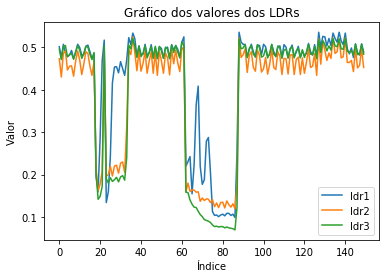

In [9]:
df[['ldr1', 'ldr2', 'ldr3']].plot(kind='line')

plt.title('Gráfico dos valores dos LDRs')
plt.xlabel('Índice')
plt.ylabel('Valor')

plt.show()

In [ ]:
df[['ldr1', 'ldr2', 'ldr3']].plot(kind='line')